In [1]:
import pandas as pd
import numpy as np
from project_lib import Project
!pip install holidays
import holidays
import matplotlib.pyplot as plt
import seaborn as sns
project = Project(project_id='9fe28646-ea2d-4be4-9c55-76c95be04bc4', project_access_token='p-ce641907fd78abfc6af00ec243c63be6c416f7f2')
pc = project.project_context

     |████████████████████████████████| 155 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 5.4 MB 46.2 MB/s eta 0:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730974 sha256=19fa784c468b0eea843626f9e99f609bf463e2234c34facdaa0a4e24a0f6c425
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/a0/8b/b2/810ae5a6f970c8be4725353400d643c90de1c0f023a9884ee7
Successfully built pymeeus


In [2]:
# df_load_actual = pd.read_csv(project.get_file("demand_UTC_v2.csv"))
# df_load_actual["Datetime_UTC"] = pd.to_datetime(df_load_actual["Datetime_UTC"], utc=True)
# df_load_actual["Datetime_EST"] = df_load_actual["Datetime_UTC"].dt.tz_convert("US/Eastern")

In [3]:
# df_load_actual = df_load_actual[["Datetime_UTC","Datetime_EST","load"]]

In [4]:
# df_load_actual.rename(columns={"load":"MWH_actual"}, inplace=True)

In [5]:
# df_load_actual

In [6]:
# df_weather_actual = pd.read_csv(project.get_file("wsi_observed_UTC.csv"))
# df_weather_actual["Datetime_UTC"] = pd.to_datetime(df_weather_actual["Datetime_UTC"], utc=True)
# df_weather_actual["Datetime_EST"] = df_weather_actual["Datetime_UTC"].dt.tz_convert("US/Eastern")
# df_weather_actual

In [7]:
# station_codes = ["AVL","EWN","FAY","FBG","GSB","ILM","NCA","NKT","POB","RDU"] #,"FLO"]
# df_weather_actual = df_weather_actual[df_weather_actual["StationCode"].isin(station_codes)]
# df_weather_actual["StationCode"].unique()

In [8]:
# df = df_weather_actual.copy()
# dfs = pd.DataFrame(df_weather_actual["Datetime_UTC"].unique(), columns=["Datetime_UTC"]).set_index("Datetime_UTC")
# dfs
# for station in station_codes:
#     #print(station)
#     df = df_weather_actual[['Datetime_UTC','DBWind','DBDryBulb','DBWetBulb','DBRH','DBSky','StationCode']]
#     df = df[df['StationCode']==station].drop('StationCode',axis = 1)
#     df.columns = ['Datetime_UTC'] + [i+"_"+station for i in df.columns[1:]]
#     dfs = pd.merge(dfs, df, on = ['Datetime_UTC'], how = 'outer')
# dfs
# # project.save_data("wsi_observed_utc_stations_flat.csv", dfs.to_csv(index=False))

In [9]:
# dfs.columns

In [10]:
# df_load_weather = df_load_actual.merge(dfs, on="Datetime_UTC", how="left")
# df_load_weather

In [11]:
# project.save_data("hourly_load_actual_weather_utc_stations_flat.csv", df_load_weather.to_csv(index=False))

In [12]:
# df_load_weather = pd.read_csv(project.get_file("hourly_load_actual_weather_utc_stations_flat.csv"))
# df_load_weather["Datetime_UTC"] = pd.to_datetime(df_load_weather["Datetime_UTC"], utc=True)
# df_load_weather["Datetime_EST"] = df_load_weather["Datetime_UTC"].dt.tz_convert("US/Eastern")
# df_load_weather

In [13]:
# df_load_weather.columns

In [14]:
# df = df_load_weather[['Datetime_UTC', 'Datetime_EST', 'MWH_actual', 'DBWind_AVL',
#        'DBDryBulb_AVL', 'DBWetBulb_AVL', 'DBRH_AVL', 'DBSky_AVL', 'DBWind_EWN',
#        'DBDryBulb_EWN', 'DBWetBulb_EWN', 'DBRH_EWN', 'DBSky_EWN', 'DBWind_FAY',
#        'DBDryBulb_FAY', 'DBWetBulb_FAY', 'DBRH_FAY', 'DBSky_FAY', 'DBWind_FBG',
#        'DBDryBulb_FBG', 'DBWetBulb_FBG', 'DBRH_FBG', 'DBSky_FBG', 'DBWind_GSB',
#        'DBDryBulb_GSB', 'DBWetBulb_GSB', 'DBRH_GSB']]
# df

# df = df_load_weather
# df

In [15]:
# station_codes = ["AVL","EWN","FAY"]
# weather_vars = ["DBDryBulb"]
# df = df_load_weather[["Datetime_UTC","Datetime_EST"] + [f"DBDryBulb_{s}" for s in station_codes]]
# df

In [16]:
# df.set_index('Datetime_UTC')[['MWH_actual']].plot(figsize = (20,6))
# df.describe()

In [33]:
def season_calc(month):
    """defining season based on analysis of historical peak load data and temperatures at times of peaks""";
    if month in [6,7,8,9]:
        return "summer"
        
    if month in [5,10]:
        return "t1"
        
    if month in [4,11]:
        return "t2"
        
    else:
        return "winter"

In [18]:
# weekdays = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5: 'Thursday', 6: 'Friday', 7:'Saturday', 1:'Sunday'}
# df['Date'] = pd.to_datetime(df.Datetime_EST.dt.date)
# df['year'] = df.Datetime_EST.dt.year
# df['month'] = df.Datetime_EST.dt.month
# df['day'] = df.Datetime_EST.dt.day
# df['hour'] = df.Datetime_EST.dt.hour
# df['weekday'] = df.Datetime_EST.dt.day_name()
# df['season'] = df.Datetime_EST.dt.month.apply(season_calc)

In [19]:
# df.head()

In [20]:
# us_holidays = holidays.US()
# df['EST_Holiday']= df['Datetime_EST'].apply( lambda x: (x in us_holidays)+0)

In [21]:
# #adding in another column which indicates 'non-working' days which include weekends and holidays
# df['non_working'] = df.apply(lambda x: 1 if \
#                                          ((x['EST_Holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
#                                          else 0, axis = 1)

In [2]:
df = pd.read_csv(project.get_file("Actual_Load_Weather_Degree_Days V2.csv"))
# df.columns
df_summer = df[df["season"] == "summer"]
df_summer.head()
df_winter = df[df["season"] == "winter"]
df_t1 = df[df["season"] == "t1"]                    ### t1 = May and October
df_t2 = df[df["season"] == "t2"]                    ### t2 = April and November

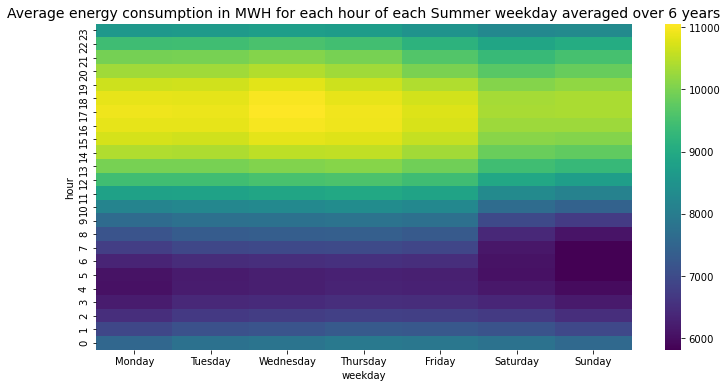

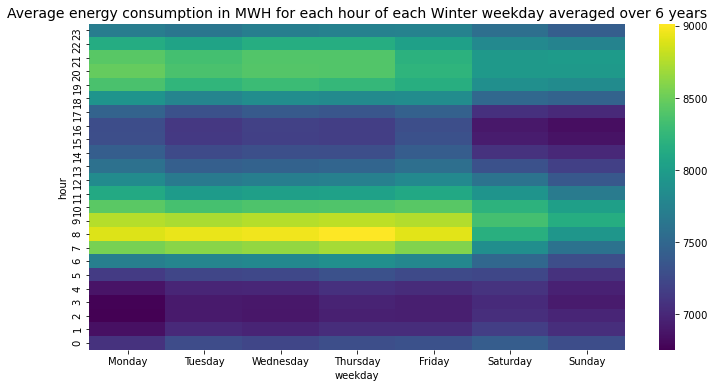

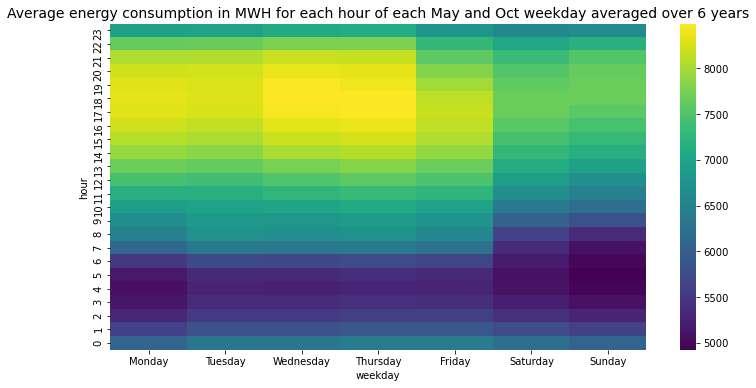

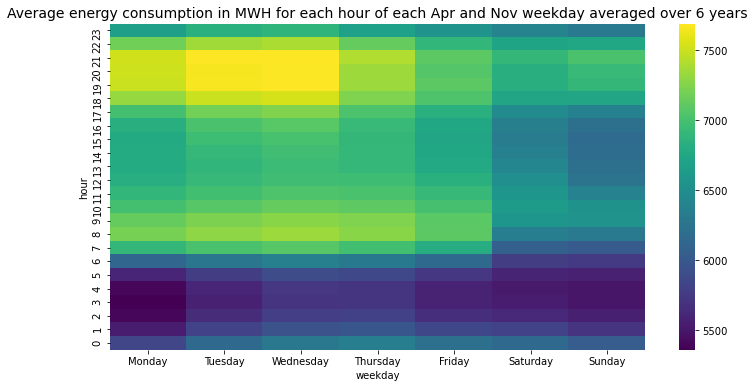

In [23]:
#Using pivot table to create a dataframe having index as hours and columns as weekdays and each cell will contain the average
#energy consumption for that particular hour of the weekday

# summer
hour_weekday_summer = df_summer.pivot_table(values='MWH_actual', index='hour', columns = 'weekday', aggfunc = 'mean')
column_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hour_weekday_summer = hour_weekday_summer.reindex(column_order, axis=1)
hour_weekday_summer.head()

# winter 
hour_weekday_winter = df_winter.pivot_table(values='MWH_actual', index='hour', columns = 'weekday', aggfunc = 'mean')
column_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hour_weekday_winter = hour_weekday_winter.reindex(column_order, axis=1)

# may_oct
hour_weekday_t1 = df_t1.pivot_table(values='MWH_actual', index='hour', columns = 'weekday', aggfunc = 'mean')
column_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hour_weekday_t1 = hour_weekday_t1.reindex(column_order, axis=1)

# apr_nov
hour_weekday_t2 = df_t2.pivot_table(values='MWH_actual', index='hour', columns = 'weekday', aggfunc = 'mean')
column_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hour_weekday_t2 = hour_weekday_t2.reindex(column_order, axis=1)

#plotting a heatmap with a colorbar; the colorbar shows the energy consumption in MWH

#summer
_ = plt.figure(figsize=(12, 6))
ax = sns.heatmap(hour_weekday_summer.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average energy consumption in MWH for each hour of each Summer weekday averaged over 6 years", fontsize = 14)

#winter
_ = plt.figure(figsize=(12, 6))
ax = sns.heatmap(hour_weekday_winter.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average energy consumption in MWH for each hour of each Winter weekday averaged over 6 years", fontsize = 14)

#may_oct
_ = plt.figure(figsize=(12, 6))
ax = sns.heatmap(hour_weekday_t1.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average energy consumption in MWH for each hour of each May and Oct weekday averaged over 6 years", fontsize = 14)

#apr_nov
_ = plt.figure(figsize=(12, 6))
ax = sns.heatmap(hour_weekday_t2.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average energy consumption in MWH for each hour of each Apr and Nov weekday averaged over 6 years", fontsize = 14)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


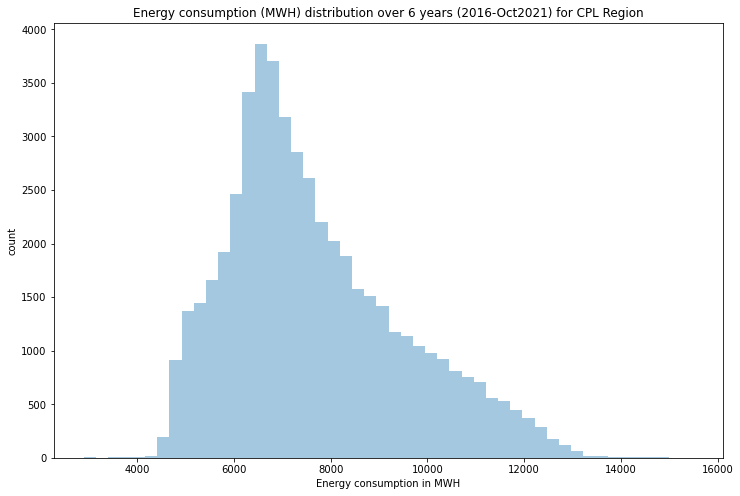

In [24]:
_ = plt.figure(figsize = (12,8))
_ = sns.distplot(df['MWH_actual'], kde=False)
_ = plt.title('Energy consumption (MWH) distribution over 6 years (2016-Oct2021) for CPL Region')
_ = plt.xlabel('Energy consumption in MWH')
_ = plt.ylabel('count')

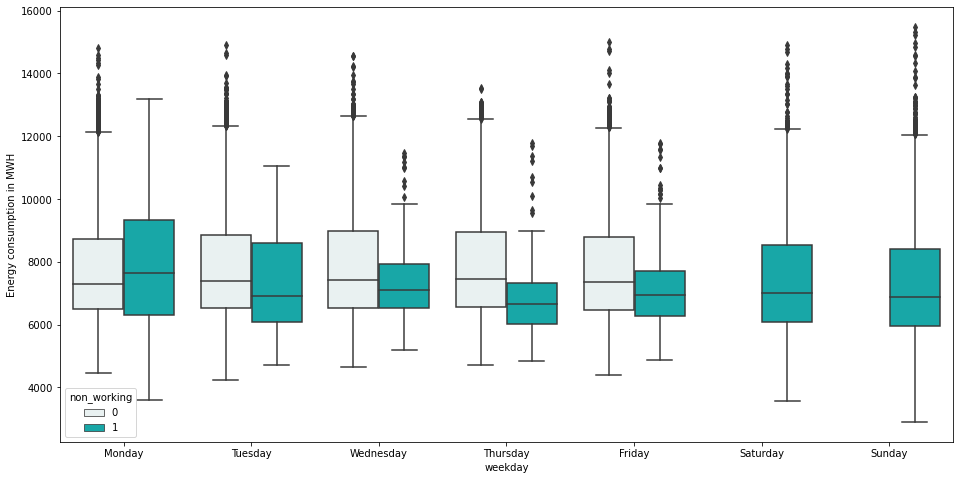

In [25]:
_ = plt.figure(figsize = (16,8))
_ = sns.boxplot(x = 'weekday', y = 'MWH_actual', data = df, color='c', hue='non_working', order = column_order)
_ = plt.ylabel('Energy consumption in MWH')

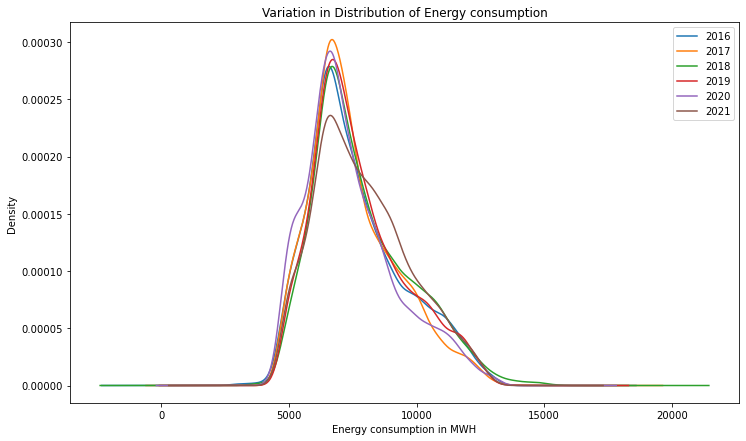

In [26]:
for year in df['year'].unique():
    df[df['year'] == year]['MWH_actual'].plot(kind='density', figsize = (12,7), legend = True, label = year)
_ = plt.xlabel('Energy consumption in MWH')
_ = plt.title('Variation in Distribution of Energy consumption')

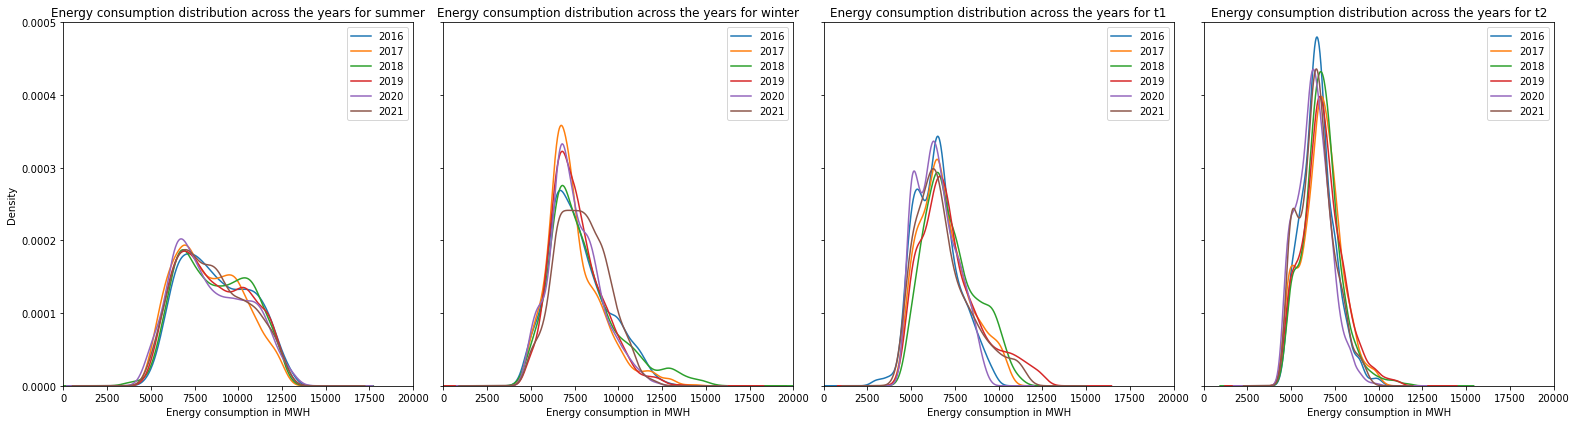

In [27]:
season = ['summer', 'winter', 't1', 't2']
#color_names = ["tab:blue", "tab:orange", "tab:green", "tab:red" , "tab:purple"]
for i, season in enumerate(season):
    
    ax = plt.subplot(141+i)
    for j, year in enumerate(df['year'].unique()):
        _ = df[(df['year'] == year) & (df['season'] == season)]['MWH_actual'].\
                                plot(kind='density', figsize=(22,6), legend=True, label= year, sharey=True)#, \
                                #c = color_names[j])
    _ = plt.title('Energy consumption distribution across the years for '+season)
    _ = plt.ylim(-0.0, 0.0005)
    _ = plt.xlim(-0, 20000)
    _ = plt.xlabel('Energy consumption in MWH')

_ = plt.tight_layout()

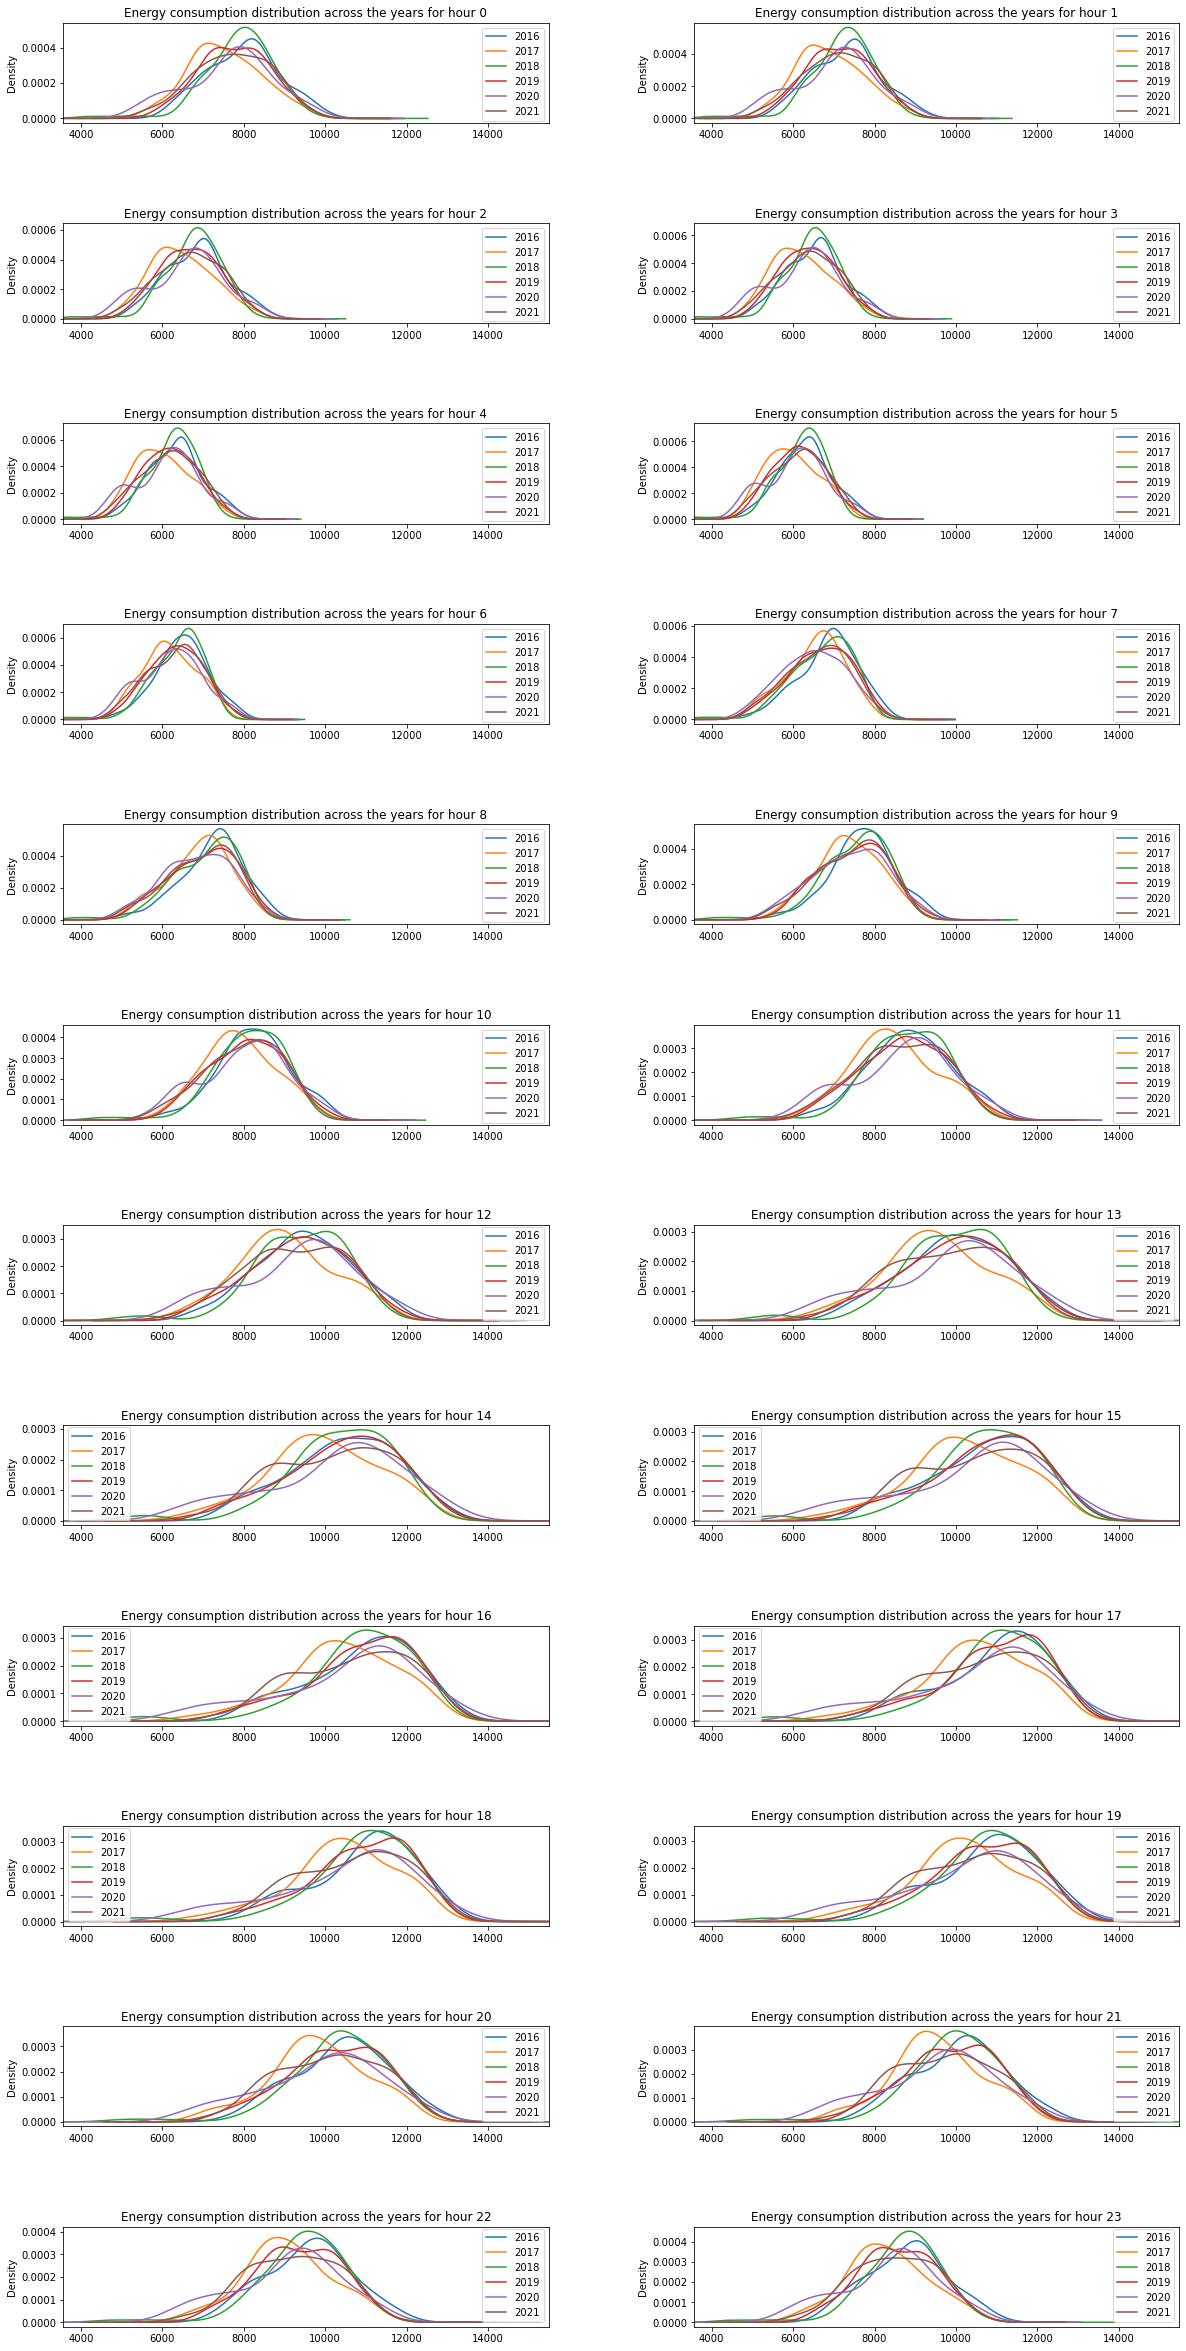

In [28]:
# summer

f = plt.figure(figsize = (20,40))
peak_hours = np.arange(0,24) 
for i, hour in enumerate(peak_hours):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(df['year'].unique()):
        df_summer[(df_summer['year'] == year) & (df_summer['hour'] == hour)]['MWH_actual'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)# ,\
                                #c = color_names[j])
    plt.title('Energy consumption distribution across the years for hour '+str(hour))
    plt.xlim(np.min(df_summer.MWH_actual.values), np.max(df.MWH_actual.values))
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=1)

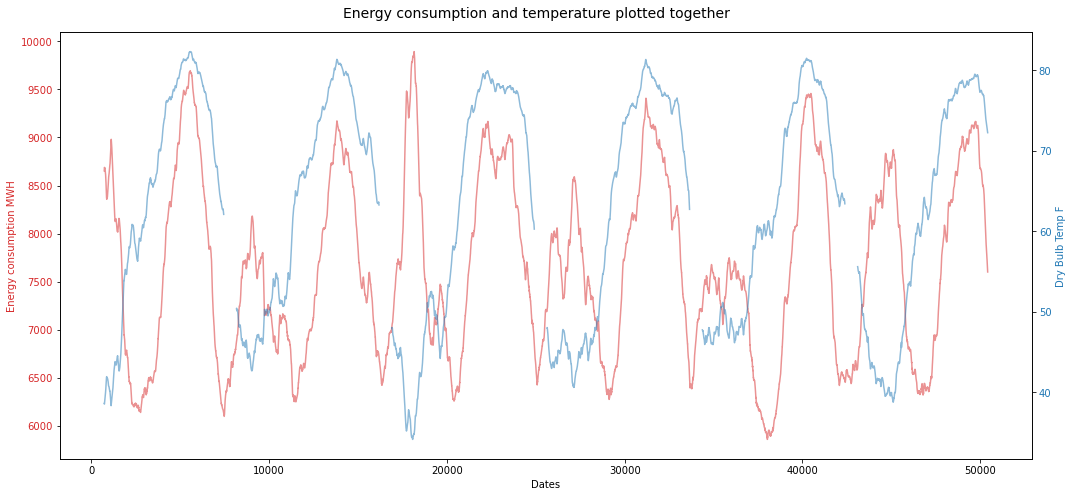

In [29]:
# Plotting the energy and weather data on the same graph as line plots
fig, ax1 = plt.subplots(figsize=(15,7))
rolling_num = 24*30 # smoothing the data a bit by taking the mean of last 'rolling_num' values 
#i.e. plotting the 30 day average energy consumption and temperature values 
color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy consumption MWH', color = color)
ax1.plot(df['MWH_actual'].rolling(rolling_num).mean(), color = color, alpha = 0.5)        
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Dry Bulb Temp F', color = color)  # we already handled the x-label with ax1
ax2.plot(df['DBDryBulb_RDU'].rolling(rolling_num).mean(), color = color, alpha = 0.5)   
ax2.tick_params(axis='y', labelcolor = color)

fig.suptitle('Energy consumption and temperature plotted together', fontsize = 14)
fig.tight_layout()
plt.show()


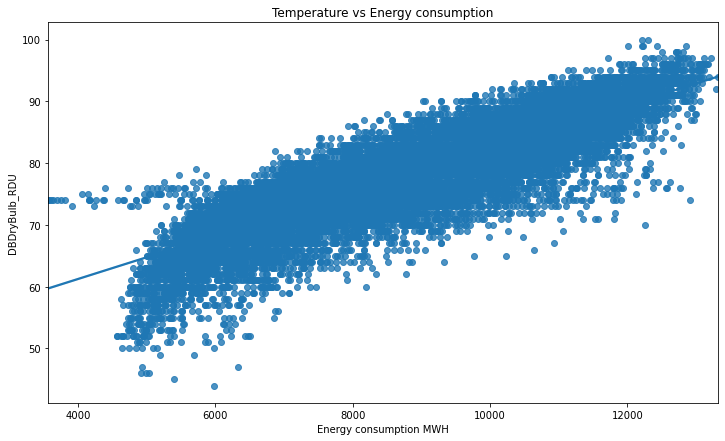

In [30]:

season = ['summer'] # edit this accordingly if you want to plot the regplot for any one particular season
_ = plt.figure(figsize=(12,7))
hours = np.arange(0,23) # edit this accordingly if you want to plot the regplot for a particular range of hours
_ = sns.regplot(x= 'MWH_actual', y= 'DBDryBulb_RDU' , data= \
            df[(df['season'].isin(season)) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy consumption MWH')
_ = plt.title('Temperature vs Energy consumption')


In [34]:
df.head()
df.columns

Index(['Unnamed: 0', 'Datetime_UTC', 'Datetime_EST', 'MWH_actual',
       'DBWind_AVL', 'DBDryBulb_AVL', 'DBWetBulb_AVL', 'DBRH_AVL', 'DBSky_AVL',
       'DBWind_EWN', 'DBDryBulb_EWN', 'DBWetBulb_EWN', 'DBRH_EWN', 'DBSky_EWN',
       'DBWind_FAY', 'DBDryBulb_FAY', 'DBWetBulb_FAY', 'DBRH_FAY', 'DBSky_FAY',
       'DBWind_FBG', 'DBDryBulb_FBG', 'DBWetBulb_FBG', 'DBRH_FBG', 'DBSky_FBG',
       'DBWind_GSB', 'DBDryBulb_GSB', 'DBWetBulb_GSB', 'DBRH_GSB', 'DBSky_GSB',
       'DBWind_ILM', 'DBDryBulb_ILM', 'DBWetBulb_ILM', 'DBRH_ILM', 'DBSky_ILM',
       'DBWind_NCA', 'DBDryBulb_NCA', 'DBWetBulb_NCA', 'DBRH_NCA', 'DBSky_NCA',
       'DBWind_NKT', 'DBDryBulb_NKT', 'DBWetBulb_NKT', 'DBRH_NKT', 'DBSky_NKT',
       'DBWind_POB', 'DBDryBulb_POB', 'DBWetBulb_POB', 'DBRH_POB', 'DBSky_POB',
       'DBWind_RDU', 'DBDryBulb_RDU', 'DBWetBulb_RDU', 'DBRH_RDU', 'DBSky_RDU',
       'Date', 'year', 'month', 'day', 'hour', 'weekday', 'season',
       'EST_Holiday', 'non_working', 'DBDryBulb_AVL_cdd', 'DBDryB

In [6]:
!pip install -U ppscore
import ppscore as pps

     |████████████████████████████████| 47 kB 10.1 MB/s eta 0:00:01
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13048 sha256=00977ff371a357dcae3ee1dcfe7075e6744fe82060f1e0f38885643e3d1ce5f1
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/fb/0e/65/da65ce669381fc01b6ef990d301d3586991f89bff1175877a4
Successfully built ppscore


In [3]:
stations = ["AVL","EWN","FAY","FBG","GSB","ILM","NCA","NKT","POB","RDU"]
df_temp = df[["Datetime_UTC","Datetime_EST", "MWH_actual"] + [f"DBDryBulb_{s}" for s in stations]]

In [36]:
pps.predictors(df_temp, "MWH_actual")
predictors_df = pps.predictors(df_temp, y="MWH_actual")
# plt.figure(figsize =(16,6))
# sns.barplot(data=predictors_df, x="x", y="ppscore")

In [37]:
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,DBDryBulb_RDU,MWH_actual,0.448755,regression,True,mean absolute error,1470.021953,810.342860,DecisionTreeRegressor()
1,DBDryBulb_FAY,MWH_actual,0.442519,regression,True,mean absolute error,1456.371265,811.899283,DecisionTreeRegressor()
2,DBDryBulb_POB,MWH_actual,0.440935,regression,True,mean absolute error,1462.599213,817.688480,DecisionTreeRegressor()
3,DBDryBulb_FBG,MWH_actual,0.435552,regression,True,mean absolute error,1439.518326,812.532756,DecisionTreeRegressor()
4,DBDryBulb_GSB,MWH_actual,0.431379,regression,True,mean absolute error,1441.010666,819.388294,DecisionTreeRegressor()
5,DBDryBulb_NCA,MWH_actual,0.378198,regression,True,mean absolute error,1433.710878,891.484161,DecisionTreeRegressor()
6,DBDryBulb_EWN,MWH_actual,0.377236,regression,True,mean absolute error,1454.354952,905.719214,DecisionTreeRegressor()
7,DBDryBulb_AVL,MWH_actual,0.376708,regression,True,mean absolute error,1470.021953,916.253134,DecisionTreeRegressor()
8,DBDryBulb_ILM,MWH_actual,0.376145,regression,True,mean absolute error,1446.021565,902.107066,DecisionTreeRegressor()
9,DBDryBulb_NKT,MWH_actual,0.365675,regression,True,mean absolute error,1464.172259,928.760395,DecisionTreeRegressor()


In [7]:
df_cdd = df[["Datetime_UTC","Datetime_EST", "MWH_actual"] + [f"DBDryBulb_{s}_cdd" for s in stations]]
pps.predictors(df_cdd, "MWH_actual")
cdd_predictors_df = pps.predictors(df_cdd, y="MWH_actual")
cdd_predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,DBDryBulb_POB_cdd,MWH_actual,0.301785,regression,True,mean absolute error,1468.605911,1025.402333,DecisionTreeRegressor()
1,DBDryBulb_FBG_cdd,MWH_actual,0.300083,regression,True,mean absolute error,1468.605911,1027.901999,DecisionTreeRegressor()
2,DBDryBulb_FAY_cdd,MWH_actual,0.299000,regression,True,mean absolute error,1468.605911,1029.492426,DecisionTreeRegressor()
3,DBDryBulb_RDU_cdd,MWH_actual,0.296004,regression,True,mean absolute error,1468.605911,1033.893071,DecisionTreeRegressor()
4,DBDryBulb_GSB_cdd,MWH_actual,0.281661,regression,True,mean absolute error,1468.605911,1054.956678,DecisionTreeRegressor()
5,DBDryBulb_NCA_cdd,MWH_actual,0.251770,regression,True,mean absolute error,1468.605911,1098.854948,DecisionTreeRegressor()
6,DBDryBulb_ILM_cdd,MWH_actual,0.248030,regression,True,mean absolute error,1468.605911,1104.348194,DecisionTreeRegressor()
7,DBDryBulb_AVL_cdd,MWH_actual,0.239786,regression,True,mean absolute error,1468.605911,1116.455009,DecisionTreeRegressor()
8,DBDryBulb_EWN_cdd,MWH_actual,0.239071,regression,True,mean absolute error,1468.605911,1117.504416,DecisionTreeRegressor()
9,DBDryBulb_NKT_cdd,MWH_actual,0.234961,regression,True,mean absolute error,1468.605911,1123.540171,DecisionTreeRegressor()


In [8]:
df_hdd = df[["Datetime_UTC","Datetime_EST", "MWH_actual"] + [f"DBDryBulb_{s}_hdd" for s in stations]]
pps.predictors(df_hdd, "MWH_actual")
hdd_predictors_df = pps.predictors(df_hdd, y="MWH_actual")
hdd_predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,DBDryBulb_AVL_hdd,MWH_actual,0.208507,regression,True,mean absolute error,1468.605911,1162.391070,DecisionTreeRegressor()
1,DBDryBulb_RDU_hdd,MWH_actual,0.165405,regression,True,mean absolute error,1468.605911,1225.691034,DecisionTreeRegressor()
2,DBDryBulb_GSB_hdd,MWH_actual,0.140633,regression,True,mean absolute error,1468.605911,1262.071774,DecisionTreeRegressor()
3,DBDryBulb_FBG_hdd,MWH_actual,0.131348,regression,True,mean absolute error,1468.605911,1275.707250,DecisionTreeRegressor()
4,DBDryBulb_FAY_hdd,MWH_actual,0.130380,regression,True,mean absolute error,1468.605911,1277.128546,DecisionTreeRegressor()
5,DBDryBulb_POB_hdd,MWH_actual,0.126814,regression,True,mean absolute error,1468.605911,1282.366082,DecisionTreeRegressor()
6,DBDryBulb_EWN_hdd,MWH_actual,0.124230,regression,True,mean absolute error,1468.605911,1286.161325,DecisionTreeRegressor()
7,DBDryBulb_NCA_hdd,MWH_actual,0.113865,regression,True,mean absolute error,1468.605911,1301.383526,DecisionTreeRegressor()
8,DBDryBulb_NKT_hdd,MWH_actual,0.105020,regression,True,mean absolute error,1468.605911,1314.373534,DecisionTreeRegressor()
9,DBDryBulb_ILM_hdd,MWH_actual,0.102071,regression,True,mean absolute error,1468.605911,1318.703531,DecisionTreeRegressor()


In [9]:
# only selecting top 4 weather stations based on PPS scores and locations in state
best_stations = ["RDU","FAY","GSB", "AVL"]
df_best_stations = df[["Datetime_UTC","Datetime_EST", "MWH_actual", "Date", "year", "month", "day", "hour", "weekday", "season", "EST_Holiday", "non_working"]
                     + [f"DBWind_{s}" for s in best_stations] + [f"DBDryBulb_{s}" for s in best_stations] + [f"DBWetBulb_{s}" for s in best_stations]
                     + [f"DBRH_{s}" for s in best_stations] + [f"DBSky_{s}" for s in best_stations]]
df_best_stations
df_best_stations.columns

Index(['Datetime_UTC', 'Datetime_EST', 'MWH_actual', 'Date', 'year', 'month',
       'day', 'hour', 'weekday', 'season', 'EST_Holiday', 'non_working',
       'DBWind_RDU', 'DBWind_FAY', 'DBWind_GSB', 'DBWind_AVL', 'DBDryBulb_RDU',
       'DBDryBulb_FAY', 'DBDryBulb_GSB', 'DBDryBulb_AVL', 'DBWetBulb_RDU',
       'DBWetBulb_FAY', 'DBWetBulb_GSB', 'DBWetBulb_AVL', 'DBRH_RDU',
       'DBRH_FAY', 'DBRH_GSB', 'DBRH_AVL', 'DBSky_RDU', 'DBSky_FAY',
       'DBSky_GSB', 'DBSky_AVL'],
      dtype='object')

In [23]:
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

In [29]:
DBWind_col = df_best_stations.loc[:, "DBWind_RDU":"DBWind_AVL"]
Avg_DB_col = df_best_stations.loc[:, "DBDryBulb_RDU":"DBDryBulb_AVL"]
Avg_WB_col = df_best_stations.loc[:, "DBWetBulb_RDU":"DBWetBulb_AVL"]
DBRH_col = df_best_stations.loc[:, "DBRH_RDU":"DBRH_AVL"]
DBSky_col = df_best_stations.loc[:, "DBSky_RDU":"DBSky_AVL"]

weights = [3/10, 3/10, 3/10, 1/10]


df_best_stations['Avg_Wind'] = (DBWind_col*weights).sum(axis=1)
df_best_stations['Avg_DB_Temp'] = (Avg_DB_col*weights).sum(axis=1)
df_best_stations['Avg_WB_Temp'] = (Avg_WB_col*weights).sum(axis=1)
df_best_stations['Avg_DBRH'] = (DBRH_col*weights).sum(axis=1)
df_best_stations['Avg_Sky'] = (DBSky_col*weights).sum(axis=1)

df_best_stations.head(5)

<ipython-input-29-09bc671c7ff5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_stations['Avg_Wind'] = (DBWind_col*weights).sum(axis=1)
<ipython-input-29-09bc671c7ff5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_stations['Avg_DB_Temp'] = (Avg_DB_col*weights).sum(axis=1)
<ipython-input-29-09bc671c7ff5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Datetime_UTC,Datetime_EST,MWH_actual,Date,year,month,day,hour,weekday,season,...,DBRH_AVL,DBSky_RDU,DBSky_FAY,DBSky_GSB,DBSky_AVL,Avg_Wind,Avg_Sky,Avg_DB_Temp,Avg_WB_Temp,Avg_DBRH
0,2016-01-01 06:00:00+00:00,2016-01-01 01:00:00-05:00,5324.4385,2016-01-01,2016,1,1,1,Friday,winter,...,82.0,100.0,100.0,100.0,0.0,8.5,90.0,54.3,50.2,73.9
1,2016-01-01 07:00:00+00:00,2016-01-01 02:00:00-05:00,5137.2178,2016-01-01,2016,1,1,2,Friday,winter,...,82.0,100.0,100.0,100.0,0.0,9.7,90.0,53.0,48.9,73.9
2,2016-01-01 08:00:00+00:00,2016-01-01 03:00:00-05:00,4970.3784,2016-01-01,2016,1,1,3,Friday,winter,...,79.0,80.0,100.0,100.0,0.0,9.9,84.0,51.5,47.1,70.6
3,2016-01-01 09:00:00+00:00,2016-01-01 04:00:00-05:00,4881.2212,2016-01-01,2016,1,1,4,Friday,winter,...,79.0,80.0,100.0,100.0,0.0,7.7,84.0,50.3,46.2,71.5
4,2016-01-01 10:00:00+00:00,2016-01-01 05:00:00-05:00,4916.1343,2016-01-01,2016,1,1,5,Friday,winter,...,83.0,100.0,100.0,100.0,0.0,9.0,90.0,49.3,45.2,71.6


In [51]:
df_bs_avg = df_best_stations[["Datetime_UTC","Datetime_EST", "MWH_actual", "Date", "year", "month", "day", "hour", "weekday", "season", "EST_Holiday", "non_working", 
                              "Avg_DB_Temp", "Avg_WB_Temp", "Avg_Wind", "Avg_DBRH", "Avg_Sky"]]
df_bs_avg.head(5)

,Datetime_UTC,Datetime_EST,MWH_actual,Date,year,month,day,hour,weekday,season,EST_Holiday,non_working,Avg_DB_Temp,Avg_WB_Temp,Avg_Wind,Avg_DBRH,Avg_Sky
0,2016-01-01 06:00:00+00:00,2016-01-01 01:00:00-05:00,5324.4385,2016-01-01,2016,1,1,1,Friday,winter,1,1,54.3,50.2,8.5,73.9,90.0
1,2016-01-01 07:00:00+00:00,2016-01-01 02:00:00-05:00,5137.2178,2016-01-01,2016,1,1,2,Friday,winter,1,1,53.0,48.9,9.7,73.9,90.0
2,2016-01-01 08:00:00+00:00,2016-01-01 03:00:00-05:00,4970.3784,2016-01-01,2016,1,1,3,Friday,winter,1,1,51.5,47.1,9.9,70.6,84.0
3,2016-01-01 09:00:00+00:00,2016-01-01 04:00:00-05:00,4881.2212,2016-01-01,2016,1,1,4,Friday,winter,1,1,50.3,46.2,7.7,71.5,84.0
4,2016-01-01 10:00:00+00:00,2016-01-01 05:00:00-05:00,4916.1343,2016-01-01,2016,1,1,5,Friday,winter,1,1,49.3,45.2,9.0,71.6,90.0


In [52]:
def calc_cdd(x):
    if x >= 65: # CDD
        return  x - 65 
    else:
        return 0
        
        
def calc_hdd(x):      
    if x<= 65:   # HDD
        return 65 - x
    else:
        return 0  
    

df_bs_avg['CDD']= df_bs_avg['Avg_DB_Temp'].apply(lambda x:calc_cdd(x))
df_bs_avg['HDD']= df_bs_avg['Avg_DB_Temp'].apply(lambda x:calc_hdd(x))
    

df_bs_avg.head()

<ipython-input-52-3a46cf34997d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_avg['CDD']= df_bs_avg['Avg_DB_Temp'].apply(lambda x:calc_cdd(x))
<ipython-input-52-3a46cf34997d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_avg['HDD']= df_bs_avg['Avg_DB_Temp'].apply(lambda x:calc_hdd(x))


,Datetime_UTC,Datetime_EST,MWH_actual,Date,year,month,day,hour,weekday,season,EST_Holiday,non_working,Avg_DB_Temp,Avg_WB_Temp,Avg_Wind,Avg_DBRH,Avg_Sky,CDD,HDD
0,2016-01-01 06:00:00+00:00,2016-01-01 01:00:00-05:00,5324.4385,2016-01-01,2016,1,1,1,Friday,winter,1,1,54.3,50.2,8.5,73.9,90.0,0.0,10.7
1,2016-01-01 07:00:00+00:00,2016-01-01 02:00:00-05:00,5137.2178,2016-01-01,2016,1,1,2,Friday,winter,1,1,53.0,48.9,9.7,73.9,90.0,0.0,12.0
2,2016-01-01 08:00:00+00:00,2016-01-01 03:00:00-05:00,4970.3784,2016-01-01,2016,1,1,3,Friday,winter,1,1,51.5,47.1,9.9,70.6,84.0,0.0,13.5
3,2016-01-01 09:00:00+00:00,2016-01-01 04:00:00-05:00,4881.2212,2016-01-01,2016,1,1,4,Friday,winter,1,1,50.3,46.2,7.7,71.5,84.0,0.0,14.7
4,2016-01-01 10:00:00+00:00,2016-01-01 05:00:00-05:00,4916.1343,2016-01-01,2016,1,1,5,Friday,winter,1,1,49.3,45.2,9.0,71.6,90.0,0.0,15.7


In [53]:
project.save_data(file_name = "Actual Load and Weather - Selected Stations temp.csv",data = df_bs_avg.to_csv(index=False))

{'file_name': 'Actual Load and Weather - Selected Stations temp.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ncemcpoc-donotdelete-pr-padhssbk4xmaam',
 'asset_id': 'afd3fb72-d85e-4ff2-9f31-19f5319f9240'}

In [54]:
df = pd.read_csv(project.get_file("Actual Load and Weather - Selected Stations temp.csv"))

In [50]:
df_bs_avg = df_bs_avg.at[48437,'Avg_Wind']=3.875

AttributeError: 'float' object has no attribute 'at'

In [61]:
test.head()

,Datetime_UTC,Datetime_EST,MWH_actual,Date,year,month,day,hour,weekday,season,EST_Holiday,non_working,Avg_DB_Temp,Avg_WB_Temp,Avg_Wind,Avg_DBRH,Avg_Sky,CDD,HDD
0,2016-01-01 06:00:00+00:00,2016-01-01 01:00:00-05:00,5324.4385,2016-01-01,2016,1,1,1,Friday,winter,1,1,54.3,50.2,8.5,73.9,90.0,0.0,10.7
1,2016-01-01 07:00:00+00:00,2016-01-01 02:00:00-05:00,5137.2178,2016-01-01,2016,1,1,2,Friday,winter,1,1,53.0,48.9,9.7,73.9,90.0,0.0,12.0
2,2016-01-01 08:00:00+00:00,2016-01-01 03:00:00-05:00,4970.3784,2016-01-01,2016,1,1,3,Friday,winter,1,1,51.5,47.1,9.9,70.6,84.0,0.0,13.5
3,2016-01-01 09:00:00+00:00,2016-01-01 04:00:00-05:00,4881.2212,2016-01-01,2016,1,1,4,Friday,winter,1,1,50.3,46.2,7.7,71.5,84.0,0.0,14.7
4,2016-01-01 10:00:00+00:00,2016-01-01 05:00:00-05:00,4916.1343,2016-01-01,2016,1,1,5,Friday,winter,1,1,49.3,45.2,9.0,71.6,90.0,0.0,15.7


In [60]:
test.at[48437,'Avg_Wind']=3.875
test.iloc[48436:48439]

,Datetime_UTC,Datetime_EST,MWH_actual,Date,year,month,day,hour,weekday,season,EST_Holiday,non_working,Avg_DB_Temp,Avg_WB_Temp,Avg_Wind,Avg_DBRH,Avg_Sky,CDD,HDD
48436,2021-07-11 10:00:00+00:00,2021-07-11 06:00:00-04:00,6499.4639,2021-07-11,2021,7,11,6,Sunday,summer,0,1,74.0,73.7,1.800,97.0,55.0,9.0,0.0
48437,2021-07-11 11:00:00+00:00,2021-07-11 07:00:00-04:00,6482.9668,2021-07-11,2021,7,11,7,Sunday,summer,0,1,74.3,73.7,3.875,96.7,94.0,9.3,0.0
48438,2021-07-11 12:00:00+00:00,2021-07-11 08:00:00-04:00,6796.1284,2021-07-11,2021,7,11,8,Sunday,summer,0,1,74.9,74.9,6.300,97.9,100.0,9.9,0.0


In [62]:
project.save_data(file_name = "Actual Load and Weather - Selected Stations.csv",data = test.to_csv(index=False))

{'file_name': 'Actual Load and Weather - Selected Stations.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ncemcpoc-donotdelete-pr-padhssbk4xmaam',
 'asset_id': '81300366-6ad7-46a4-86e5-5f71fd37d409'}

In [3]:
df = pd.read_csv(project.get_file("Actual Load and Weather - Selected Stations.csv"))

In [4]:
df.head()

,Datetime_UTC,Datetime_EST,MWH_actual,Date,year,month,day,hour,weekday,season,EST_Holiday,non_working,Avg_DB_Temp,Avg_WB_Temp,Avg_Wind,Avg_DBRH,Avg_Sky,CDD,HDD
0,2016-01-01 06:00:00+00:00,2016-01-01 01:00:00-05:00,5324.4385,2016-01-01,2016,1,1,1,Friday,winter,1,1,54.3,50.2,8.5,73.9,90.0,0.0,10.7
1,2016-01-01 07:00:00+00:00,2016-01-01 02:00:00-05:00,5137.2178,2016-01-01,2016,1,1,2,Friday,winter,1,1,53.0,48.9,9.7,73.9,90.0,0.0,12.0
2,2016-01-01 08:00:00+00:00,2016-01-01 03:00:00-05:00,4970.3784,2016-01-01,2016,1,1,3,Friday,winter,1,1,51.5,47.1,9.9,70.6,84.0,0.0,13.5
3,2016-01-01 09:00:00+00:00,2016-01-01 04:00:00-05:00,4881.2212,2016-01-01,2016,1,1,4,Friday,winter,1,1,50.3,46.2,7.7,71.5,84.0,0.0,14.7
4,2016-01-01 10:00:00+00:00,2016-01-01 05:00:00-05:00,4916.1343,2016-01-01,2016,1,1,5,Friday,winter,1,1,49.3,45.2,9.0,71.6,90.0,0.0,15.7


<AxesSubplot:xlabel='Date', ylabel='Avg_DB_Temp'>

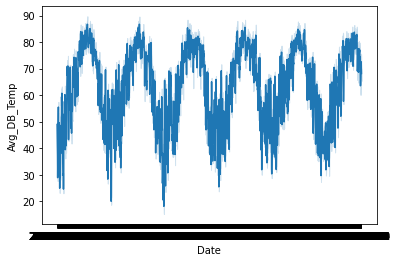

In [11]:
sns.lineplot(data=df, x="Date", y="Avg_DB_Temp")
# fig.show()

In [2]:
import os, types
from botocore.client import Config
import ibm_boto3

In [3]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ac690f53b41549f185254c8c98d18df2 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ac690f53b41549f185254c8c98d18df2 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_ac690f53b41549f185254c8c98d18df2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AJ6jjn_AjwDM9B4R5cYcjGr8ZpZD7Cwxseew2i4hBoUX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ac690f53b41549f185254c8c98d18df2)

In [4]:
body = client_ac690f53b41549f185254c8c98d18df2.get_object(Bucket='ncemcpoc-donotdelete-pr-padhssbk4xmaam',Key='wsi_hourly_6am_flat_v2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

wth_forecast = pd.read_csv(body)
wth_forecast.head()

wth_forecast['HistoryDate'] = pd.to_datetime(wth_forecast['HistoryDate'])
wth_forecast['Datetime'] = pd.to_datetime(wth_forecast['Datetime'])
wth_forecast["Datetime_EST"] = wth_forecast.Datetime.dt.tz_localize(tz="US/Eastern", ambiguous=True, nonexistent="NaT")
wth_forecast["Datetime_UTC"] = wth_forecast.Datetime_EST.dt.tz_convert("UTC")
wth_forecast.head()

,HistoryDate,Datetime,DBWind_AVL,DBWind_EWN,DBWind_FAY,DBWind_FBG,DBWind_GSB,DBWind_ILM,DBWind_NCA,DBWind_NKT,...,DBSky_FAY,DBSky_FBG,DBSky_GSB,DBSky_ILM,DBSky_NCA,DBSky_NKT,DBSky_POB,DBSky_RDU,Datetime_EST,Datetime_UTC
0,2019-10-01 06:00:00,2019-10-01 01:00:00,0.0,6.0,6.0,7.0,5.0,5.0,0.0,7.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,2019-10-01 01:00:00-04:00,2019-10-01 05:00:00+00:00
1,2019-10-01 06:00:00,2019-10-01 02:00:00,0.0,5.0,0.0,3.0,3.0,7.0,6.0,9.0,...,20.0,80.0,0.0,0.0,0.0,0.0,50.0,20.0,2019-10-01 02:00:00-04:00,2019-10-01 06:00:00+00:00
2,2019-10-01 06:00:00,2019-10-01 03:00:00,3.0,6.0,5.0,0.0,3.0,7.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,80.0,20.0,2019-10-01 03:00:00-04:00,2019-10-01 07:00:00+00:00
3,2019-10-01 06:00:00,2019-10-01 04:00:00,0.0,5.0,5.0,3.0,3.0,7.0,6.0,6.0,...,80.0,80.0,0.0,0.0,0.0,0.0,100.0,20.0,2019-10-01 04:00:00-04:00,2019-10-01 08:00:00+00:00
4,2019-10-01 06:00:00,2019-10-01 05:00:00,0.0,4.0,2.0,2.0,2.0,7.0,4.0,7.0,...,10.0,20.0,20.0,10.0,10.0,20.0,20.0,40.0,2019-10-01 05:00:00-04:00,2019-10-01 09:00:00+00:00


In [5]:
wth_forecast.columns

Index(['HistoryDate', 'Datetime', 'DBWind_AVL', 'DBWind_EWN', 'DBWind_FAY',
       'DBWind_FBG', 'DBWind_GSB', 'DBWind_ILM', 'DBWind_NCA', 'DBWind_NKT',
       'DBWind_POB', 'DBWind_RDU', 'DBDryBulb_AVL', 'DBDryBulb_EWN',
       'DBDryBulb_FAY', 'DBDryBulb_FBG', 'DBDryBulb_GSB', 'DBDryBulb_ILM',
       'DBDryBulb_NCA', 'DBDryBulb_NKT', 'DBDryBulb_POB', 'DBDryBulb_RDU',
       'DBWetBulb_AVL', 'DBWetBulb_EWN', 'DBWetBulb_FAY', 'DBWetBulb_FBG',
       'DBWetBulb_GSB', 'DBWetBulb_ILM', 'DBWetBulb_NCA', 'DBWetBulb_NKT',
       'DBWetBulb_POB', 'DBWetBulb_RDU', 'DBRH_AVL', 'DBRH_EWN', 'DBRH_FAY',
       'DBRH_FBG', 'DBRH_GSB', 'DBRH_ILM', 'DBRH_NCA', 'DBRH_NKT', 'DBRH_POB',
       'DBRH_RDU', 'DBSky_AVL', 'DBSky_EWN', 'DBSky_FAY', 'DBSky_FBG',
       'DBSky_GSB', 'DBSky_ILM', 'DBSky_NCA', 'DBSky_NKT', 'DBSky_POB',
       'DBSky_RDU', 'Datetime_EST', 'Datetime_UTC'],
      dtype='object')

In [13]:
best_stations = ["RDU","FAY","GSB", "AVL"]
wth_fc_best_stations = wth_forecast[["HistoryDate","Datetime"]
                                     + [f"DBWind_{s}" for s in best_stations] + [f"DBDryBulb_{s}" for s in best_stations] +[f"DBRH_{s}" for s in best_stations]
                                     + [f"DBWetBulb_{s}" for s in best_stations] + [f"DBSky_{s}" for s in best_stations]]

wth_fc_best_stations
wth_fc_best_stations.columns

Index(['HistoryDate', 'Datetime', 'DBWind_RDU', 'DBWind_FAY', 'DBWind_GSB',
       'DBWind_AVL', 'DBDryBulb_RDU', 'DBDryBulb_FAY', 'DBDryBulb_GSB',
       'DBDryBulb_AVL', 'DBRH_RDU', 'DBRH_FAY', 'DBRH_GSB', 'DBRH_AVL',
       'DBWetBulb_RDU', 'DBWetBulb_FAY', 'DBWetBulb_GSB', 'DBWetBulb_AVL',
       'DBSky_RDU', 'DBSky_FAY', 'DBSky_GSB', 'DBSky_AVL'],
      dtype='object')

In [14]:
wth_fc_best_stations['HistoryDate'] = pd.to_datetime(wth_fc_best_stations['HistoryDate'])
wth_fc_best_stations['Datetime'] = pd.to_datetime(wth_fc_best_stations['Datetime'])
wth_fc_best_stations["Datetime_EST"] = wth_fc_best_stations.Datetime.dt.tz_localize(tz="US/Eastern", ambiguous=True, nonexistent="NaT")
wth_fc_best_stations["Datetime_UTC"] = wth_fc_best_stations.Datetime_EST.dt.tz_convert("UTC")

weekdays = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5: 'Thursday', 6: 'Friday', 7:'Saturday', 1:'Sunday'}
wth_fc_best_stations['Date'] = pd.to_datetime(wth_fc_best_stations.Datetime_EST.dt.date)
wth_fc_best_stations['year'] = wth_fc_best_stations.Datetime_EST.dt.year
wth_fc_best_stations['month'] = wth_fc_best_stations.Datetime_EST.dt.month
wth_fc_best_stations['day'] = wth_fc_best_stations.Datetime_EST.dt.day
wth_fc_best_stations['hour'] = wth_fc_best_stations.Datetime_EST.dt.hour
wth_fc_best_stations['weekday'] = wth_fc_best_stations.Datetime_EST.dt.day_name()
wth_fc_best_stations['season'] = wth_fc_best_stations.Datetime_EST.dt.month.apply(season_calc)

<ipython-input-14-ddce2d13a966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wth_fc_best_stations['HistoryDate'] = pd.to_datetime(wth_fc_best_stations['HistoryDate'])
<ipython-input-14-ddce2d13a966>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wth_fc_best_stations['Datetime'] = pd.to_datetime(wth_fc_best_stations['Datetime'])
<ipython-input-14-ddce2d13a966>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

NameError: name 'season_calc' is not defined

In [15]:
us_holidays = holidays.US()
wth_fc_best_stations['EST_Holiday']= df['Datetime_EST'].apply( lambda x: (x in us_holidays)+0)

NameError: name 'df' is not defined

In [48]:
#adding in another column which indicates 'non-working' days which include weekends and holidays
wth_fc_best_stations['non_working'] = wth_fc_best_stations.apply(lambda x: 1 if \
                                         ((x['EST_Holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 0, axis = 1)

<ipython-input-48-1770e24ada3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wth_fc_best_stations['non_working'] = wth_fc_best_stations.apply(lambda x: 1 if \


In [16]:
wth_fc_best_stations.columns

Index(['HistoryDate', 'Datetime', 'DBWind_RDU', 'DBWind_FAY', 'DBWind_GSB',
       'DBWind_AVL', 'DBDryBulb_RDU', 'DBDryBulb_FAY', 'DBDryBulb_GSB',
       'DBDryBulb_AVL', 'DBRH_RDU', 'DBRH_FAY', 'DBRH_GSB', 'DBRH_AVL',
       'DBWetBulb_RDU', 'DBWetBulb_FAY', 'DBWetBulb_GSB', 'DBWetBulb_AVL',
       'DBSky_RDU', 'DBSky_FAY', 'DBSky_GSB', 'DBSky_AVL', 'Datetime_EST',
       'Datetime_UTC', 'Date', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [17]:
DBWind_col = wth_fc_best_stations.loc[:, "DBWind_RDU":"DBWind_AVL"]
Avg_DB_col = wth_fc_best_stations.loc[:, "DBDryBulb_RDU":"DBDryBulb_AVL"]
Avg_WB_col = wth_fc_best_stations.loc[:, "DBWetBulb_RDU":"DBWetBulb_AVL"]
DBRH_col = wth_fc_best_stations.loc[:, "DBRH_RDU":"DBRH_AVL"]
DBSky_col = wth_fc_best_stations.loc[:, "DBSky_RDU":"DBSky_AVL"]

weights = [3/10, 3/10, 3/10, 1/10]


wth_fc_best_stations['Avg_Wind'] = (DBWind_col*weights).sum(axis=1)
wth_fc_best_stations['Avg_DB_Temp'] = (Avg_DB_col*weights).sum(axis=1)
wth_fc_best_stations['Avg_WB_Temp'] = (Avg_WB_col*weights).sum(axis=1)
wth_fc_best_stations['Avg_DBRH'] = (DBRH_col*weights).sum(axis=1)
wth_fc_best_stations['Avg_Sky'] = (DBSky_col*weights).sum(axis=1)

wth_fc_best_stations.head(5)

<ipython-input-17-53f4a2f02ae1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wth_fc_best_stations['Avg_Wind'] = (DBWind_col*weights).sum(axis=1)
<ipython-input-17-53f4a2f02ae1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wth_fc_best_stations['Avg_DB_Temp'] = (Avg_DB_col*weights).sum(axis=1)
<ipython-input-17-53f4a2f02ae1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,HistoryDate,Datetime,DBWind_RDU,DBWind_FAY,DBWind_GSB,DBWind_AVL,DBDryBulb_RDU,DBDryBulb_FAY,DBDryBulb_GSB,DBDryBulb_AVL,...,year,month,day,hour,weekday,Avg_Wind,Avg_DB_Temp,Avg_WB_Temp,Avg_DBRH,Avg_Sky
0,2019-10-01 06:00:00,2019-10-01 01:00:00,6.0,6.0,5.0,0.0,72.0,74.0,69.0,67.0,...,2019,10,1,1,Tuesday,5.1,71.2,68.2,83.8,22.0
1,2019-10-01 06:00:00,2019-10-01 02:00:00,5.0,0.0,3.0,0.0,70.0,72.0,68.0,67.0,...,2019,10,1,2,Tuesday,2.4,69.7,67.0,85.9,22.0
2,2019-10-01 06:00:00,2019-10-01 03:00:00,0.0,5.0,3.0,3.0,69.0,71.0,68.0,67.0,...,2019,10,1,3,Tuesday,2.7,69.1,66.9,87.9,16.0
3,2019-10-01 06:00:00,2019-10-01 04:00:00,0.0,5.0,3.0,0.0,69.0,70.0,67.0,67.0,...,2019,10,1,4,Tuesday,2.4,68.5,66.6,88.5,40.0
4,2019-10-01 06:00:00,2019-10-01 05:00:00,2.0,2.0,2.0,0.0,68.0,69.0,66.0,67.0,...,2019,10,1,5,Tuesday,1.8,67.6,66.3,90.4,27.0


In [18]:
def calc_cdd(x):
    if x >= 65: # CDD
        return  x - 65 
    else:
        return 0
        
        
def calc_hdd(x):      
    if x<= 65:   # HDD
        return 65 - x
    else:
        return 0  
    

wth_fc_best_stations['CDD']= wth_fc_best_stations['Avg_DB_Temp'].apply(lambda x:calc_cdd(x))
wth_fc_best_stations['HDD']= wth_fc_best_stations['Avg_DB_Temp'].apply(lambda x:calc_hdd(x))
    

wth_fc_best_stations.columns

<ipython-input-18-ed0c05b3bbdd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wth_fc_best_stations['CDD']= wth_fc_best_stations['Avg_DB_Temp'].apply(lambda x:calc_cdd(x))
<ipython-input-18-ed0c05b3bbdd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wth_fc_best_stations['HDD']= wth_fc_best_stations['Avg_DB_Temp'].apply(lambda x:calc_hdd(x))


Index(['HistoryDate', 'Datetime', 'DBWind_RDU', 'DBWind_FAY', 'DBWind_GSB',
       'DBWind_AVL', 'DBDryBulb_RDU', 'DBDryBulb_FAY', 'DBDryBulb_GSB',
       'DBDryBulb_AVL', 'DBRH_RDU', 'DBRH_FAY', 'DBRH_GSB', 'DBRH_AVL',
       'DBWetBulb_RDU', 'DBWetBulb_FAY', 'DBWetBulb_GSB', 'DBWetBulb_AVL',
       'DBSky_RDU', 'DBSky_FAY', 'DBSky_GSB', 'DBSky_AVL', 'Datetime_EST',
       'Datetime_UTC', 'Date', 'year', 'month', 'day', 'hour', 'weekday',
       'Avg_Wind', 'Avg_DB_Temp', 'Avg_WB_Temp', 'Avg_DBRH', 'Avg_Sky', 'CDD',
       'HDD'],
      dtype='object')

In [23]:
df_fc_bs = wth_fc_best_stations[["HistoryDate","Datetime","Avg_DB_Temp", "Avg_Wind", "Avg_DBRH", "Avg_WB_Temp","Avg_Sky", "CDD", "HDD"]]
df_fc_bs.head()

,HistoryDate,Datetime,Avg_DB_Temp,Avg_Wind,Avg_DBRH,Avg_WB_Temp,Avg_Sky,CDD,HDD
0,2019-10-01 06:00:00,2019-10-01 01:00:00,71.2,5.1,83.8,68.2,22.0,6.2,0.0
1,2019-10-01 06:00:00,2019-10-01 02:00:00,69.7,2.4,85.9,67.0,22.0,4.7,0.0
2,2019-10-01 06:00:00,2019-10-01 03:00:00,69.1,2.7,87.9,66.9,16.0,4.1,0.0
3,2019-10-01 06:00:00,2019-10-01 04:00:00,68.5,2.4,88.5,66.6,40.0,3.5,0.0
4,2019-10-01 06:00:00,2019-10-01 05:00:00,67.6,1.8,90.4,66.3,27.0,2.6,0.0


In [25]:
project.save_data(file_name = "Forecasted Weather - Selected Stations v2.csv",data = df_fc_bs.to_csv(index=False))

{'file_name': 'Forecasted Weather - Selected Stations v2.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ncemcpoc-donotdelete-pr-padhssbk4xmaam',
 'asset_id': '5baaf9d8-519d-430d-8ec1-c3f8dc651f80'}

In [26]:
df = pd.read_csv(project.get_file("Forecasted Weather - Selected Stations v2.csv"))

In [27]:
df.head()

,HistoryDate,Datetime,Avg_DB_Temp,Avg_Wind,Avg_DBRH,Avg_WB_Temp,Avg_Sky,CDD,HDD
0,2019-10-01 06:00:00,2019-10-01 01:00:00,71.2,5.1,83.8,68.2,22.0,6.2,0.0
1,2019-10-01 06:00:00,2019-10-01 02:00:00,69.7,2.4,85.9,67.0,22.0,4.7,0.0
2,2019-10-01 06:00:00,2019-10-01 03:00:00,69.1,2.7,87.9,66.9,16.0,4.1,0.0
3,2019-10-01 06:00:00,2019-10-01 04:00:00,68.5,2.4,88.5,66.6,40.0,3.5,0.0
4,2019-10-01 06:00:00,2019-10-01 05:00:00,67.6,1.8,90.4,66.3,27.0,2.6,0.0


In [13]:
df_fc_bs = df.drop(columns=['Datetime_EST', 'Date', 'year', 'month', 'day', 'hour', 'weekday','season','EST_Holiday','non_working'])
df_fc_bs.rename(columns={"Datetime_UTC":"Datetime"}, inplace=True)
df_fc_bs.head()

,HistoryDate,Datetime,Avg_DB_Temp,Avg_Wind,Avg_DBRH,CDD,HDD
0,2019-10-01 06:00:00,2019-10-01 05:00:00+00:00,71.2,5.1,83.8,6.2,0.0
1,2019-10-01 06:00:00,2019-10-01 06:00:00+00:00,69.7,2.4,85.9,4.7,0.0
2,2019-10-01 06:00:00,2019-10-01 07:00:00+00:00,69.1,2.7,87.9,4.1,0.0
3,2019-10-01 06:00:00,2019-10-01 08:00:00+00:00,68.5,2.4,88.5,3.5,0.0
4,2019-10-01 06:00:00,2019-10-01 09:00:00+00:00,67.6,1.8,90.4,2.6,0.0


In [28]:
# project.save_data(file_name = "Fmtd Forecasted Weather - Selected Stations.csv",data = df.to_csv(index=False))

{'file_name': 'Fmtd Forecasted Weather - Selected Stations.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ncemcpoc-donotdelete-pr-padhssbk4xmaam',
 'asset_id': 'c26dc3a1-5932-4eb7-bb60-b1a9eb33f597'}